## Brooklyn Nine-Nine Ratings Analysis

![title](b_99.jpg)

In [709]:
# import libraries
from urllib.request import urlopen as ureq
from bs4 import BeautifulSoup as soup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import time

### Episode Info from Wikipedia

#### Scraping data

In [710]:
# get html
url = "https://en.wikipedia.org/wiki/List_of_Brooklyn_Nine-Nine_episodes"
uclient = ureq(url)
page_html = uclient.read()
uclient.close()

# get episode data on page
page_soup = soup(page_html,"html.parser")
seasons = page_soup.findAll("table",{"class":"wikitable plainrowheaders wikiepisodetable"})
seasons = seasons[:-1]
seasons = seasons[:-1]

# store data in a pandas dataframe
column_names = ['prod_code','episode_title','directed_by','written_by','air_date','us_viewers','season_no','episode_no']
wiki_b99 = pd.DataFrame(columns=column_names)
for season in seasons:
    episodes = season.findAll("tr",{"class":"vevent"})
    for episode in episodes:
        wiki_b99 = wiki_b99.append({'prod_code': episode.findAll('td')[5].text, 'episode_title': episode.findAll('td')[1].text, 'directed_by': episode.findAll('td')[2].text, 'written_by': episode.findAll('td')[3].text, 'air_date': episode.findAll('td')[4].span.span.text, 'us_viewers': episode.findAll('td')[6].text}, ignore_index=True)

# clean columns
wiki_b99['episode_title'] = wiki_b99['episode_title'].str.replace('"','')
wiki_b99['us_viewers'] = wiki_b99['us_viewers'].str.split('[').str[0]

# clean data for title = 'The Fugitive'
wiki_b99 = wiki_b99[wiki_b99['episode_title']!='The Fugitive']
wiki_b99 = wiki_b99.append({'prod_code': '411', 'episode_title': 'The Fugitive: Part 1', 'directed_by': 'Rebecca Asher', 'written_by': 'Carol Kolb', 'air_date': '2017-01-01', 'us_viewers': '3.49'}, ignore_index=True)
wiki_b99 = wiki_b99.append({'prod_code': '412', 'episode_title': 'The Fugitive: Part 2', 'directed_by': 'Ryan Case', 'written_by': 'Justin Noble & Jessica Polonsky', 'air_date': '2017-01-01', 'us_viewers': '3.49'}, ignore_index=True)

wiki_b99['season_no'] = wiki_b99['prod_code'].str[:1]
wiki_b99['episode_no'] = wiki_b99['prod_code'].str[1:3]

print(wiki_b99.shape)
wiki_b99.head()

(130, 8)


,prod_code,episode_title,directed_by,written_by,air_date,us_viewers,season_no,episode_no
0,101,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,6.17,1,01
1,102,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,4.03,1,02
2,105,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,3.43,1,05
3,106,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,3.34,1,06
4,104,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,3.43,1,04


#### Creating additional columns

In [711]:
# create parts
column_names = ['air_date','parts']
parts = pd.DataFrame(columns=column_names)
parts['air_date'] = wiki_b99[wiki_b99.groupby('air_date')['air_date'].transform('size') > 1]['air_date'].unique()
parts['parts'] = '2'
wiki_b99 = pd.merge(wiki_b99,two_part,on=['air_date'],how='left')
wiki_b99 = wiki_b99.fillna(1)

# create episode type
column_names = ['episode_title','episode_type']
data = [['Halloween','Halloween Episode'], ['Pontiac Bandit','Pontiac Bandit Episode'], ['Charges and Specs','Season Finale'], ['Undercover','Season Premiere'], ['Halloween II','Halloween Episode'], ['The Pontiac Bandit Returns','Pontiac Bandit Episode'], ['Johnny and Dora','Season Finale'], ['New Captain','Season Premiere'], ['Halloween III','Halloween Episode'], ['The Cruise','Pontiac Bandit Episode'], ['Greg and Larry','Season Finale'], ['Coral Palms: Part 1','Season Premiere'], ['Halloween IV','Halloween Episode'], ['The Fugitive: Part 2','Pontiac Bandit Episode'], ['Crime and Punishment','Season Finale'], ['The Big House: Part 1','Season Premiere'], ['HalloVeen','Halloween Episode'], ['99','99th Episode'], ['Game Night','100th Episode'], ['The Box','Bottle Episode'], ['Jake & Amy','Season Finale'], ['Honeymoon','Season Premiere'], ['A Tale of Two Bandits','Pontiac Bandit Episode'], ['Cinco de Mayo','Halloween Episode'], ['Suicide Squad','Season Finale']
]
episode_type = pd.DataFrame(data=data,columns=column_names)
wiki_b99 = pd.merge(wiki_b99,episode_type,on=['episode_title'],how='left')
wiki_b99 = wiki_b99.fillna('Normal Episode')

# create network
column_names = ['season_no','network']
data = [['1','Fox'], ['2','Fox'], ['3','Fox'], ['4','Fox'], ['5','Fox'], ['6','NBC']]
network = pd.DataFrame(data=data,columns=column_names)
wiki_b99 = pd.merge(wiki_b99,network,on=['season_no'],how='left')

# correct column datatypes
wiki_b99['air_date']=pd.to_datetime(wiki_b99['air_date'])
wiki_b99['us_viewers']=pd.to_numeric(wiki_b99['us_viewers'])

wiki_b99
#wiki_b99.to_csv('wiki_b99.csv')

,prod_code,episode_title,directed_by,written_by,air_date,us_viewers,season_no,episode_no,parts,episode_type,network
0,101,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,6.17,1,01,1,Normal Episode,Fox
1,102,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,4.03,1,02,1,Normal Episode,Fox
2,105,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,3.43,1,05,1,Normal Episode,Fox
3,106,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,3.34,1,06,1,Normal Episode,Fox
4,104,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,3.43,1,04,1,Normal Episode,Fox
...,...,...,...,...,...,...,...,...,...,...,...
125,616,Cinco de Mayo,Rebecca Asher,David Phillips,2019-05-09,1.83,6,16,1,Halloween Episode,NBC
126,617,Sicko,Matthew Nodella,Justin Noble,2019-05-16,1.63,6,17,2,Normal Episode,NBC
127,618,Suicide Squad,Dan Goor,Dan Goor & Luke Del Tredici,2019-05-16,1.55,6,18,2,Season Finale,NBC
128,411,The Fugitive: Part 1,Rebecca Asher,Carol Kolb,2017-01-01,3.49,4,11,2,Normal Episode,Fox


#### Exploring Data 

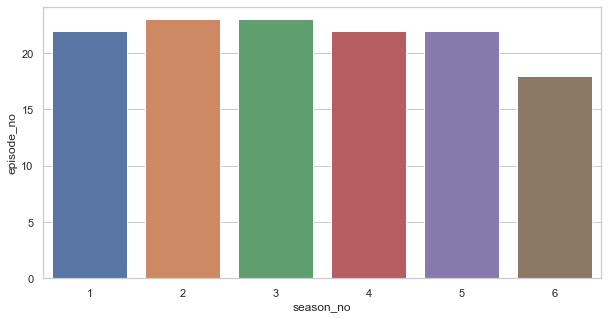

In [712]:
# episode count by season
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax = sns.barplot(x="season_no", y="episode_no", data=wiki_b99.groupby(['season_no']).count().reset_index())

We observe that seasons 1 to 5 have more than 20 episodes. Season 6 has only 18 episodes as this was the season when the show moved from Fox to NBC and got a late premiere.

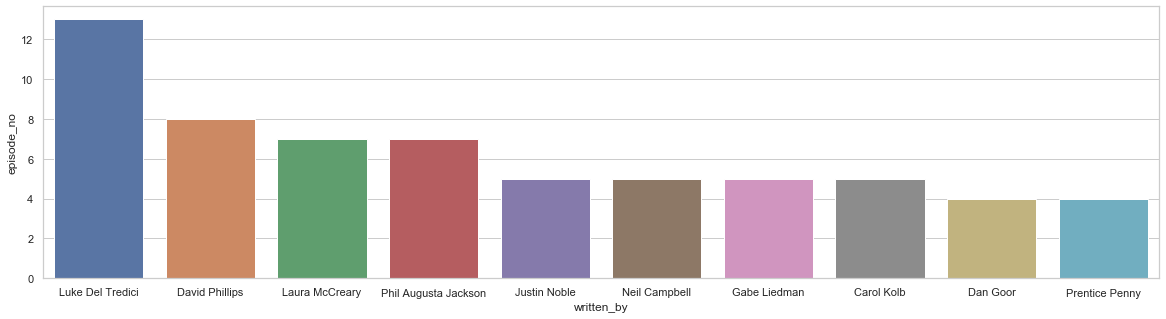

In [713]:
# episode count by writer
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.barplot(x="written_by", y="episode_no", data=wiki_b99.groupby(['written_by']).count().reset_index().sort_values(by='episode_no',ascending=False).head(10))

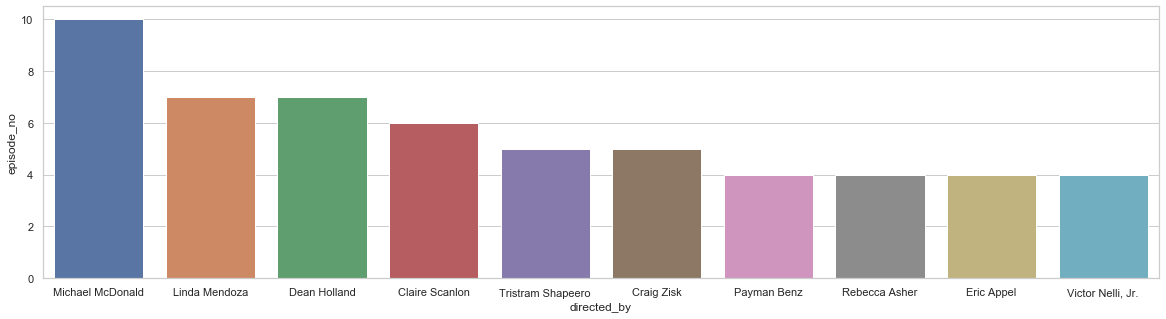

In [714]:
# episode count by director
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.barplot(x="directed_by", y="episode_no", data=wiki_b99.groupby(['directed_by']).count().reset_index().sort_values(by='episode_no',ascending=False).head(10))

We observe that writer Luke Del Tredici and director Michael McDonald are the top writer and director respectively by episode count. The show's creator Dan Goor wrote 4 episodes and ranks #9 among the top writers by episode count.

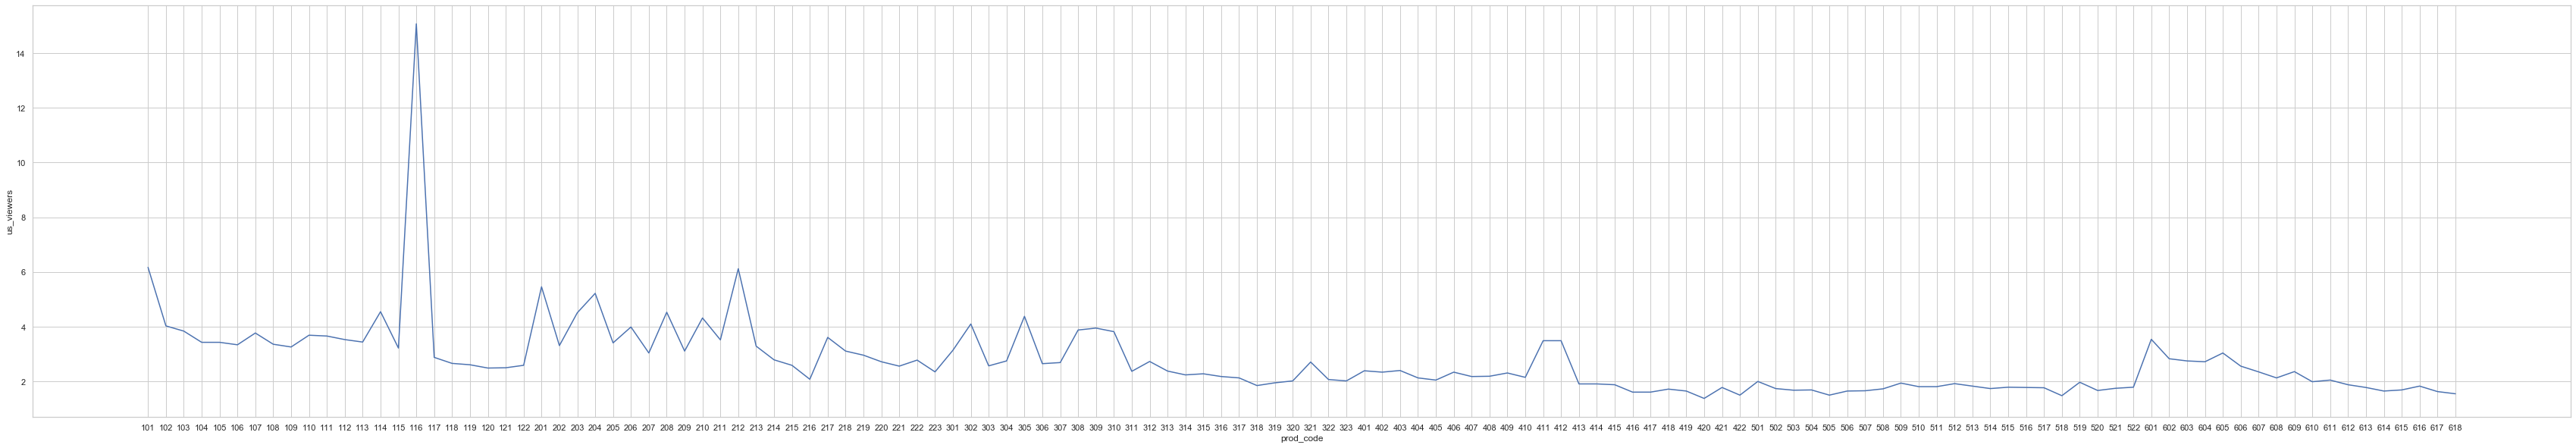

In [724]:
# total US viewers by season and episode
fig, ax = plt.subplots(1,1,figsize=(60,10))
sns.lineplot(x="prod_code", y="us_viewers", data=wiki_b99.groupby(['prod_code']).sum().reset_index())

We observe that the US viewers shows a decreasing trend with spikes for certain episodes. 

S01E15-Operation: Broken Feather was watched approximately 15 million US viewers which is unusally high for the show. This episode was written by show creator Dan Goor & Michael Schur.

We observe a spike during S06E01-Honeymoon when the show moved from Fox to NBC. This season premiere episode was watched by twice as many viewers as the past season's finale episode.

,season_no,us_viewers
0,1,3.978182
1,2,3.538261
2,3,2.733043
3,4,2.109545
4,5,1.759091
5,6,2.240556


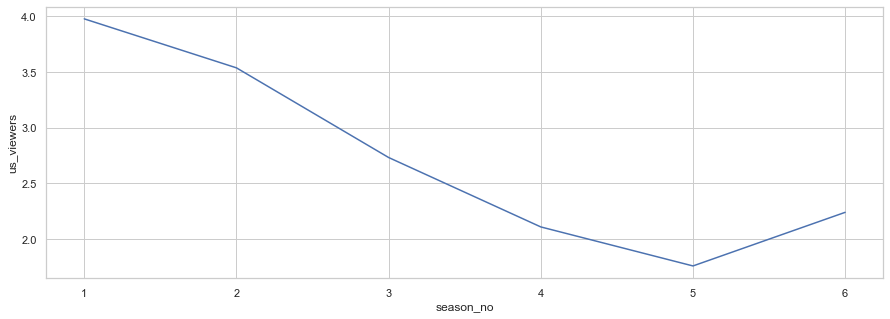

In [733]:
# average US viewers by season
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.lineplot(x="season_no", y="us_viewers", data=wiki_b99.groupby(['season_no']).mean().reset_index())
wiki_b99.groupby(['season_no']).mean().reset_index()

We observe that the average US viewers decreases from season 1 to season 5 and then increases 1.27 times in season 6 compared to season 5. The show became really popular when season 6 was airing as its cancellation after season 5 by Fox was a hot discussion topic on Reddit and Twitter leading to a lot of word-of-mouth marketing. (I also was among the viewers who discovered this brilliant show during this time)

,network,us_viewers
0,Fox,2.829196
1,NBC,2.240556


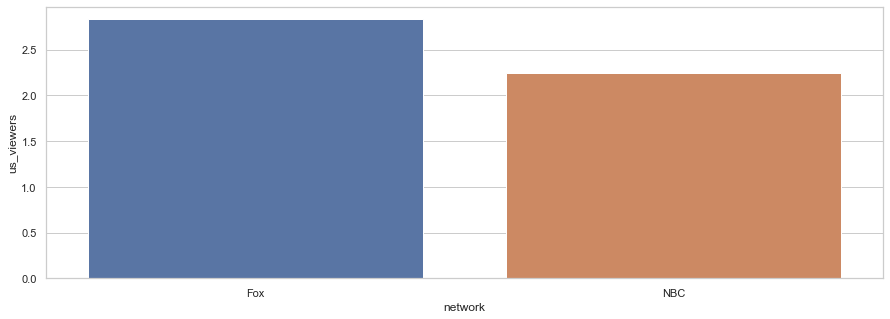

In [734]:
# average US viewers by network
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.barplot(x="network", y="us_viewers", data=wiki_b99.groupby(['network']).mean().reset_index())
wiki_b99.groupby(['network']).mean().reset_index()

We observe that the show 1.26 times more average US viewers when it aired on Fox than when it aired on NBC. Note that we have five seasons worth of data for Fox and only one season worth of data for NBC.

,episode_type,us_viewers
0,100th Episode,1.810000
1,99th Episode,1.940000
2,Bottle Episode,1.780000
3,Halloween Episode,3.156667
4,Normal Episode,2.740286
5,Pontiac Bandit Episode,3.334000
6,Season Finale,1.966667
7,Season Premiere,3.306000


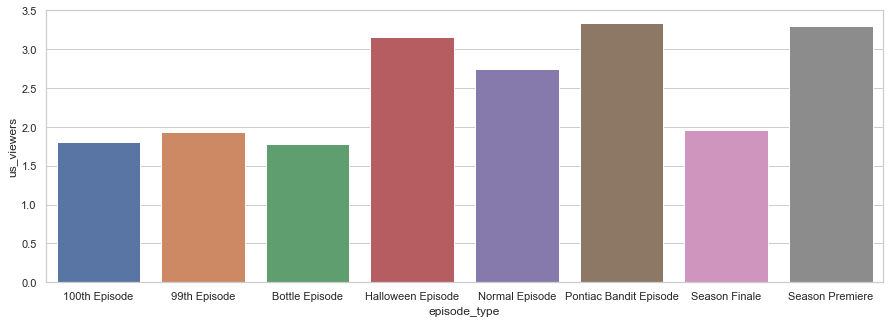

In [735]:
# average US viewers by episode type
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.barplot(x="episode_type", y="us_viewers", data=wiki_b99.groupby(['episode_type']).mean().reset_index())
wiki_b99.groupby(['episode_type']).mean().reset_index()

We observe that the show's 99th and 100th episode had approximately 2/3rd of the normal viewership count.

Season premiere episodes have 20.66% more average US viewers than normal episodes. The same is not true for Season finale episodes which have 28.2% less average US viewers than that of normal episodes.

Halloween heist episodes have 15.19% more average US viewers than normal episodes.

Pontaic bandit episodes starring guest star 'Craig Robinson' have 21.67% more average US viewers than normal episodes.

,parts,us_viewers
0,1,2.850172
1,2,1.898571


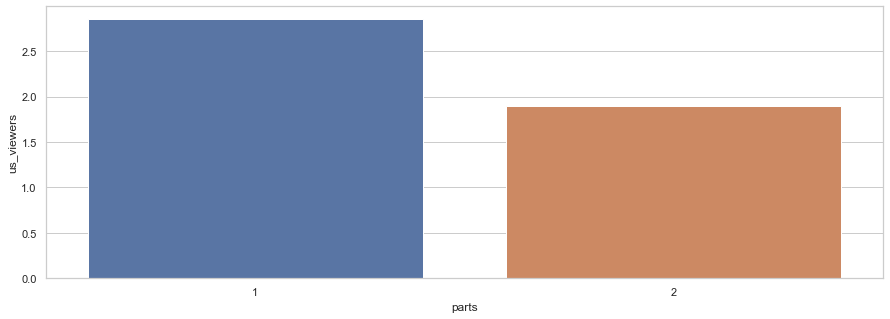

In [736]:
# average US viewers by parts
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.barplot(x="parts", y="us_viewers", data=wiki_b99.groupby(['parts']).mean().reset_index())
wiki_b99.groupby(['parts']).mean().reset_index()

We expect that two-part episodes aired back-to-back would pull in more viewers but single episodes have 1.5 times the average US viewers than two-part episodes.


### Critic Ratings from The A.V. Club

#### Scraping data

In [802]:
# fetch data for 20 episodes per season
column_names = ['season_no','air_date','avclub_rating']
av_club_b99 = pd.DataFrame(columns=column_names)
    
for i in range(1,7):
    # get html
    url = "https://www.avclub.com/c/tv-review/brooklyn-nine-nine/season-"+str(i)
    uclient = ureq(url)
    page_html = uclient.read()
    uclient.close()
    
    # get articles on page
    page_soup = soup(page_html,"html.parser")
    articles = page_soup.findAll("article",{"class":"js_post_item cw4lnv-0 glgzMx"})
    
    # store data in a pandas dataframe
    for article in articles:
        av_club_b99 = av_club_b99.append({'season_no': i, 'avclub_rating': article.figure.div.div.text, 'air_date': article.div.findAll("div",{"class":"sc-3nbvzd-1 VhErj"})[0].text}, ignore_index=True)

av_club_b99['air_date'] = pd.to_datetime(av_club_b99['air_date'])

print(av_club_b99.shape)
av_club_b99.head()

(115, 3)


,season_no,air_date,avclub_rating
0,1,2014-03-25,A
1,1,2014-03-19,B+
2,1,2014-03-12,A-
3,1,2014-03-04,A-
4,1,2014-02-26,B-


In [803]:
# fetch data for remaining episodes per season
# get min date per season
av_club_b99_date = av_club_b99.groupby('season_no').agg({'air_date':['min']})['air_date','min']

for i in range(1,7):
    # convert min date to epoch timestamp in milliseconds
    date_time = av_club_b99_date
    pattern = '%Y-%m-%d %H:%M:%S'
    av_club_b99_epoch = int(time.mktime(time.strptime(str(date_time[i]), pattern)))
    
    # get html
    url = "https://www.avclub.com/c/tv-review/brooklyn-nine-nine/season-"+str(i)+'?startTime='+str(av_club_b99_epoch*1000)
    uclient = ureq(url)
    page_html = uclient.read()
    uclient.close()
    
    # get articles on page
    page_soup = soup(page_html,"html.parser")
    articles = page_soup.findAll("article",{"class":"js_post_item cw4lnv-0 glgzMx"})
    
    # store data in a pandas dataframe (av_club_b99)
    for article in articles:
        av_club_b99 = av_club_b99.append({'season_no': i, 'avclub_rating': article.figure.div.div.text, 'air_date': article.div.findAll("div",{"class":"sc-3nbvzd-1 VhErj"})[0].text}, ignore_index=True)
        
av_club_b99['air_date'] = pd.to_datetime(av_club_b99['air_date'])

print(av_club_b99.shape)
av_club_b99.head()

(123, 3)


,season_no,air_date,avclub_rating
0,1,2014-03-25,A
1,1,2014-03-19,B+
2,1,2014-03-12,A-
3,1,2014-03-04,A-
4,1,2014-02-26,B-


#### Cleaning data

In [804]:
# remove air dates with missing ratings
av_club_b99 = av_club_b99[av_club_b99['avclub_rating']!='']

print(av_club_b99.shape)
av_club_b99.head()

(116, 3)


,season_no,air_date,avclub_rating
0,1,2014-03-25,A
1,1,2014-03-19,B+
2,1,2014-03-12,A-
3,1,2014-03-04,A-
4,1,2014-02-26,B-


#### Combining AV Club Ratings Data with Wikipedia Episode Info Data

In [805]:
combined = pd.merge(wiki_b99, av_club_b99[['air_date','avclub_rating']], on='air_date', how='left')

print(combined.shape)
combined.head()

(130, 12)


,prod_code,episode_title,directed_by,written_by,air_date,us_viewers,season_no,episode_no,parts,episode_type,network,avclub_rating
0,101,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,6.17,1,01,1,Normal Episode,Fox,B+
1,102,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,4.03,1,02,1,Normal Episode,Fox,NaN
2,105,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,3.43,1,05,1,Normal Episode,Fox,B+
3,106,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,3.34,1,06,1,Normal Episode,Fox,B
4,104,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,3.43,1,04,1,Normal Episode,Fox,A-


#### Manually aggregating missing AV Club ratings data

In [807]:
av_club_b99_1 = av_club_b99
av_club_b99_1['air_date'] = av_club_b99_1['air_date'] - pd.DateOffset(1)
av_club_b99_1.tail(30)

,season_no,air_date,avclub_rating
92,5,2017-11-14,B-
93,5,2017-11-06,B+
94,5,2017-10-16,A
95,5,2017-10-09,B+
96,5,2017-10-02,C+
97,5,2017-09-25,B
99,6,2019-05-09,A
100,6,2019-05-02,B-
101,6,2019-04-25,B-
102,6,2019-04-19,A


In [808]:
# identify episodes with missing ratings

combined=pd.merge(combined, av_club_b99_1[['air_date','avclub_rating']], on='air_date', how='left')

print(combined.shape)
combined.head()

(130, 13)


,prod_code,episode_title,directed_by,written_by,air_date,us_viewers,season_no,episode_no,parts,episode_type,network,avclub_rating_x,avclub_rating_y
0,101,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,6.17,1,01,1,Normal Episode,Fox,B+,NaN
1,102,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,4.03,1,02,1,Normal Episode,Fox,NaN,B
2,105,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,3.43,1,05,1,Normal Episode,Fox,B+,NaN
3,106,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,3.34,1,06,1,Normal Episode,Fox,B,NaN
4,104,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,3.43,1,04,1,Normal Episode,Fox,A-,NaN


In [814]:
combined['avclub_rating_x'] = combined['avclub_rating_x'].fillna(combined['avclub_rating_y'])

combined.head()

,prod_code,episode_title,directed_by,written_by,air_date,us_viewers,season_no,episode_no,parts,episode_type,network,avclub_rating_x,avclub_rating_y
0,101,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,6.17,1,01,1,Normal Episode,Fox,B+,NaN
1,102,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,4.03,1,02,1,Normal Episode,Fox,B,B
2,105,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,3.43,1,05,1,Normal Episode,Fox,B+,NaN
3,106,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,3.34,1,06,1,Normal Episode,Fox,B,NaN
4,104,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,3.43,1,04,1,Normal Episode,Fox,A-,NaN


In [815]:
combined[combined['avclub_rating_x'].isnull()]

,prod_code,episode_title,directed_by,written_by,air_date,us_viewers,season_no,episode_no,parts,episode_type,network,avclub_rating_x,avclub_rating_y
82,416,Cop-Con,Giovani Lampassi,Andy Gosche,2017-05-09,1.61,4,16,2,Normal Episode,Fox,NaN,NaN
83,417,Chasing Amy,Luke Del Tredici,Matt Lawton,2017-05-09,1.61,4,17,2,Normal Episode,Fox,NaN,NaN
84,419,Your Honor,Michael McDonald,David Phillips & Carly Hallam Tosh,2017-05-16,1.65,4,19,2,Normal Episode,Fox,NaN,NaN
85,420,The Slaughterhouse,Victor Nelli Jr.,Neil Campbell,2017-05-16,1.38,4,20,2,Normal Episode,Fox,NaN,NaN
86,421,The Bank Job,Matthew Nodella,Carol Kolb,2017-05-23,1.78,4,21,2,Normal Episode,Fox,NaN,NaN
87,422,Crime and Punishment,Dan Goor,Justin Noble & Jessica Polonsky,2017-05-23,1.50,4,22,2,Season Finale,Fox,NaN,NaN
97,510,Game Night,Tristram Shapeero,Justin Noble & Carly Hallam Tosh,2017-12-12,1.81,5,10,2,100th Episode,Fox,NaN,NaN
98,511,The Favor,Victor Nelli Jr.,Aeysha Carr,2017-12-12,1.81,5,11,2,Normal Episode,Fox,NaN,NaN
103,515,NutriBoom,Trent O'Donnell,David Phillips,2018-04-15,1.79,5,15,2,Normal Episode,Fox,NaN,NaN
104,518,DFW,Jaffar Mahmood,Jeff Topolski,2018-04-15,1.48,5,18,2,Normal Episode,Fox,NaN,NaN


### User Ratings from IMDB

In [187]:
# get html (imdb)
url = "https://www.imdb.com/title/tt2467372/episodes?season=1"
uclient = ureq(url)
page_html = uclient.read()
uclient.close()

In [188]:
# get episode data on page (imdb)
page_soup = soup(page_html,"html.parser")
episodes = page_soup.findAll("div",{"class":"info"})

In [189]:
# check if any episode data is fetched i.e. len(episodes)>0
len(episodes)

22

In [190]:
# store episode name, date, total votes and rating in a pandas dataframe (imdb_b99)
column_names = ['episode_air_date','episode_rating','episode_name','total_votes']
imdb_b99 = pd.DataFrame(columns=column_names)
for episode in episodes:
    try:
        imdb_b99 = imdb_b99.append({'episode_air_date': episode.findAll("div",{"class":"airdate"})[0].text, 'episode_rating': episode.findAll("span",{"class":"ipl-rating-star__rating"})[0].text, 'episode_name':episode.a['title'],'total_votes':episode.findAll("span",{"class":"ipl-rating-star__total-votes"})[0].text}, ignore_index=True)
        break
    except IndexError:
        imdb_b99 = imdb_b99.append({'episode_air_date': episode.findAll("div",{"class":"airdate"})[0].text, 'episode_rating': '', 'episode_name':episode.a['title'],'total_votes':''}, ignore_index=True)
imdb_b99['episode_air_date'] = pd.to_datetime(imdb_b99['episode_air_date'].replace('\n', '').str.strip())
imdb_b99['total_votes'] = pd.to_numeric(imdb_b99['total_votes'].str[1:6].str.replace(',',''))
imdb_b99.head()

,episode_air_date,episode_rating,episode_name,total_votes
0,2013-09-17,7.8,Pilot,3307


In [191]:
#episode.findAll("div",{"class":"airdate"})[0].text
episode

<div class="info" itemprop="episodes" itemscope="" itemtype="http://schema.org/TVEpisode">
<meta content="1" itemprop="episodeNumber"/>
<div class="airdate">
            17 Sep. 2013
    </div>
<strong><a href="/title/tt2936284/" itemprop="name" title="Pilot">Pilot</a></strong>
<div class="ipl-rating-widget">
<div class="ipl-rating-star small">
<span class="ipl-rating-star__star">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
</span>
<span class="ipl-rating-star__rating">7.8</span>
<span class="ipl-rating-star__total-votes">(3,307)</span>
</div>
<div class="ipl-rating-interactive small ipl-rating-interactive--no-rating">
<input class="ipl-rating-interactive__state" data-reftag="ttep_ep1_rt" data-tconst="t

In [203]:
column_names = ['episode_air_date','episode_rating','episode_name','total_votes']
imdb_b99 = pd.DataFrame(columns=column_names)

for i in range(1,7):
    # get html (imdb)
    url = "https://www.imdb.com/title/tt2467372/episodes?season="+str(i)
    uclient = ureq(url)
    page_html = uclient.read()
    uclient.close()
    
    # get episode data on page (imdb)
    page_soup = soup(page_html,"html.parser")
    episodes = page_soup.findAll("div",{"class":"info"})
    
    # check if any episode data is fetched i.e. len(episodes)>0
    len(episodes)
    
    # store episode name, date, total votes and rating in a pandas dataframe (imdb_b99)
    for episode in episodes:
        imdb_b99 = imdb_b99.append({'episode_air_date': episode.findAll("div",{"class":"airdate"})[0].text, 'episode_rating': episode.findAll("span",{"class":"ipl-rating-star__rating"})[0].text, 'episode_name':episode.a['title'],'total_votes':episode.findAll("span",{"class":"ipl-rating-star__total-votes"})[0].text}, ignore_index=True)

imdb_b99['episode_rating'] = pd.to_numeric(imdb_b99['episode_rating'])
imdb_b99['episode_air_date'] = pd.to_datetime(imdb_b99['episode_air_date'].replace('\n', '').str.strip())
imdb_b99['total_votes'] = pd.to_numeric(imdb_b99['total_votes'].str[1:6].str.replace(',',''))

imdb_b99.head()
imdb_b99.shape

(130, 4)

### Combining Ratings from The A.V. Club and IMDB

In [204]:
av_club_imdb_b99 = pd.merge(av_club_b99, imdb_b99, on='episode_air_date')
av_club_imdb_b99.head()

,season,episode_air_date,episode_rating_x,episode_rating_y,episode_name,total_votes
0,1,2014-03-25,A,8.9,Charges and Specs,2448
1,1,2014-03-04,A-,8.5,Tactical Village,2075
2,1,2014-01-14,A-,8.8,The Bet,2445
3,1,2014-01-07,B+,8.2,Pontiac Bandit,2156
4,1,2013-12-03,B,8.2,Christmas,2100


In [205]:
column_names = ['rating_letter','rating_num']
data = [['A',10], ['A-',9], ['B+',8], ['B',7], ['B-',6], ['C+',5], ['C',4], ['C-',3], ['D+',2], ['D',1]]
av_club_rating = pd.DataFrame(data,columns = column_names)
av_club_rating.head()

,rating_letter,rating_num
0,A,10
1,A-,9
2,B+,8
3,B,7
4,B-,6


In [206]:
av_club_imdb_b99 = pd.merge(av_club_imdb_b99, av_club_rating, left_on='episode_rating_x',right_on='rating_letter')
av_club_imdb_b99.head()

,season,episode_air_date,episode_rating_x,episode_rating_y,episode_name,total_votes,rating_letter,rating_num
0,1,2014-03-25,A,8.9,Charges and Specs,2448,A,10
1,2,2014-12-07,A,8.3,The Pontiac Bandit Returns,1848,A,10
2,3,2016-02-09,A,8.1,The 9-8,1559,A,10
3,3,2016-01-05,A,7.7,Hostage Situation,1594,A,10
4,3,2015-12-13,A,8.8,Yippie Kayak,1847,A,10


In [207]:
av_club_imdb_b99 = av_club_imdb_b99.rename(columns={'rating_num':'episode_rating_av_club','episode_rating_y':'episode_rating_imdb','total_votes':'total_votes_imdb'})
av_club_imdb_b99 = av_club_imdb_b99[['episode_name','episode_air_date','episode_rating_imdb','total_votes_imdb','episode_rating_av_club']]
av_club_imdb_b99

,episode_name,episode_air_date,episode_rating_imdb,total_votes_imdb,episode_rating_av_club
0,Charges and Specs,2014-03-25,8.9,2448,10
1,The Pontiac Bandit Returns,2014-12-07,8.3,1848,10
2,The 9-8,2016-02-09,8.1,1559,10
3,Hostage Situation,2016-01-05,7.7,1594,10
4,Yippie Kayak,2015-12-13,8.8,1847,10
...,...,...,...,...,...
63,Mr. Santiago,2016-11-22,8.2,1534,5
64,The Big House Pt. 2,2017-10-03,8.4,1526,5
65,A Tale of Two Bandits,2019-02-07,8.3,1396,5
66,The Tattler,2019-01-24,7.8,1382,5


### Exploratory Data Analysis

#### IMDB Votes vs IMDB Ratings

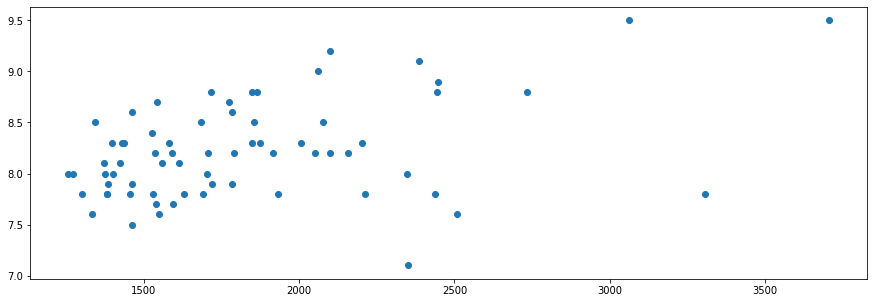

In [208]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.scatter('total_votes_imdb','episode_rating_imdb',data=av_club_imdb_b99)

#### Episode Ratings: IMDB vs The A.V. Club

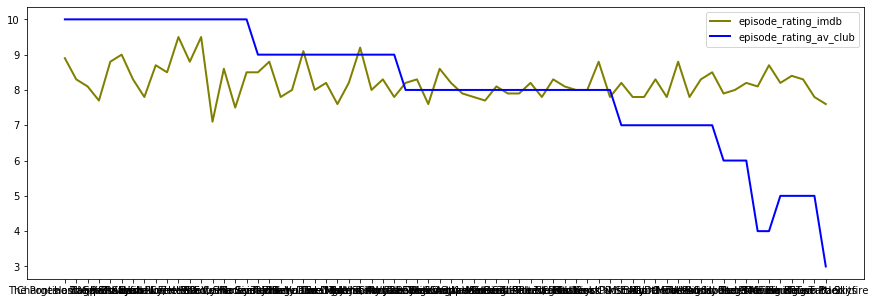

In [209]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.plot( 'episode_name', 'episode_rating_imdb', data=av_club_imdb_b99, marker='', color='olive', linewidth=2)
plt.plot( 'episode_name', 'episode_rating_av_club', data=av_club_imdb_b99, marker='', color='blue', linewidth=2)
plt.legend()